### Assessing cloudless days: clear sky days 

In [1]:
import matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import csv
import bisect
from matplotlib import dates
from datetime import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Import weather station data from Lucern Switzerland

In [2]:
irad_csv = r'irradiation_luz_2017_2018.csv'

df_rad = process_LUZ(irad_csv)
df_rad.set_index(df_rad.datetime, inplace=True)
s_rad = df_rad['gre000z0']          # 10 min mean in W/m² 

#lu_rad.head(n=2)

#### Import  sunshine duration, daily sum

In [3]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df_dur = process_LUZ_dur(dur_csv)
df_dur.set_index(df_dur.datetime, inplace=True)
df_dur['su2000d0'] = pd.to_numeric(df_dur['su2000d0'], errors='coerce')
s_dur = df_dur['su2000d0']          # in hours

#### Import sunshine duration, relative to the absolute possible daily sum

In [4]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df_rel = process_LUZ_dur(dur_csv)
df_rel.set_index(df_rel.datetime, inplace=True)
df_rel['sremaxdv'] = pd.to_numeric(df_rel['sremaxdv'], errors='coerce')
s_rel = df_rel['sremaxdv']          # in percent

#### Overview of relative insolination in 2017 from 11.17 to 12.31 at Lucern 
Description: Sonnenscheindauer; relativ zur absolut möglichen Tagessumme<br>
Long: 8°18' Lat: 47°02'

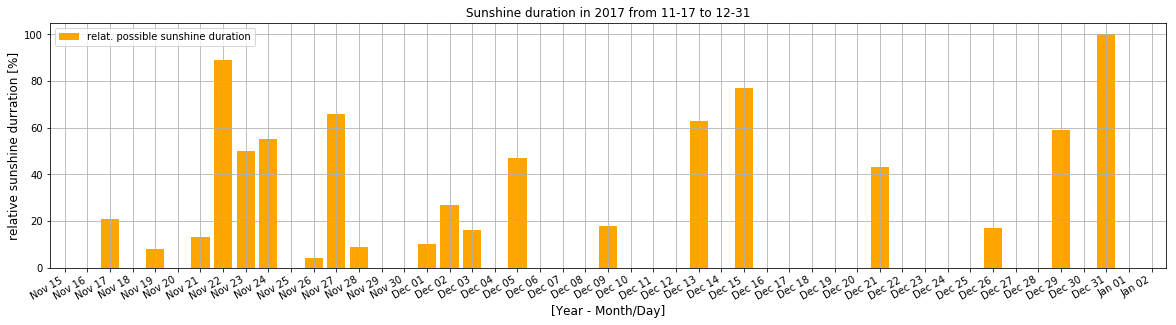

In [5]:
year = '2017-'   
s_day = '11-17' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

s_rel_17 = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_17.index, s_rel_17.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Overview of relative insolination entire year of 2018 at Lucern
Description: Sonnenscheindauer; relativ zur absolut möglichen Tagessumme<br>
Long: 8°18' Lat: 47°02'

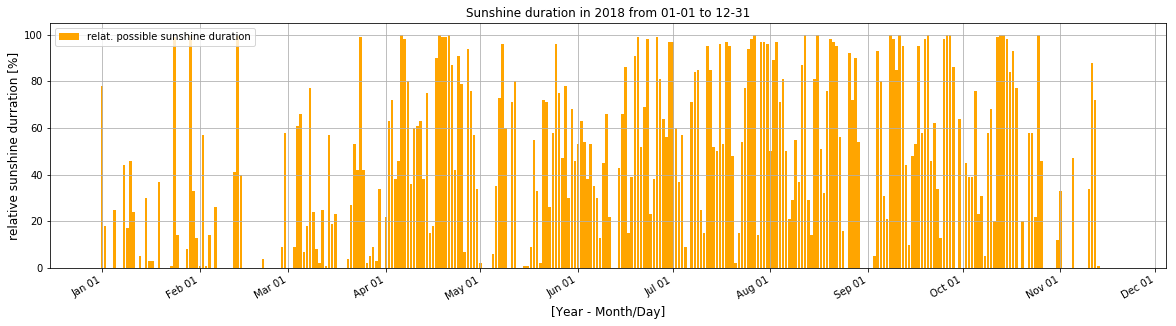

In [6]:
year = '2018-'   
s_day = '01-01' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

s_rel_18 = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_18.index, s_rel_18.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()


#### Detail view 2018 April to May

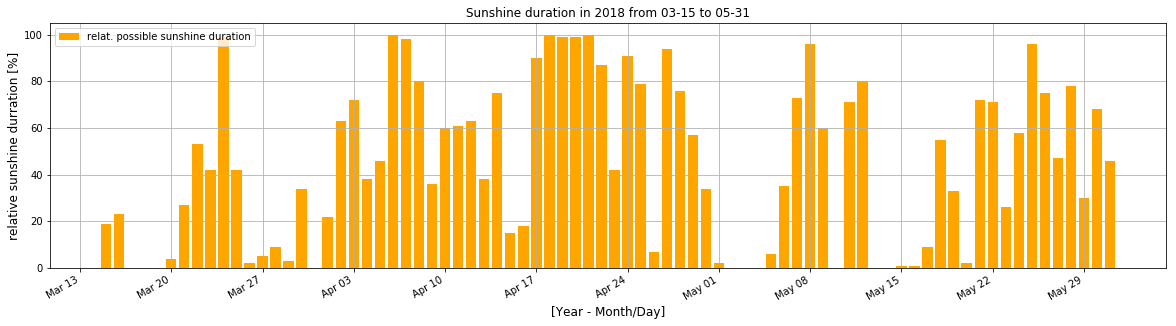

In [7]:
year = '2018-'   
s_day = '03-15' # beginning of observation
e_day = '05-31' # end of observation
start = year + s_day
end   = year + e_day

s_rel_1 = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_1.index, s_rel_1.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 Jun to July

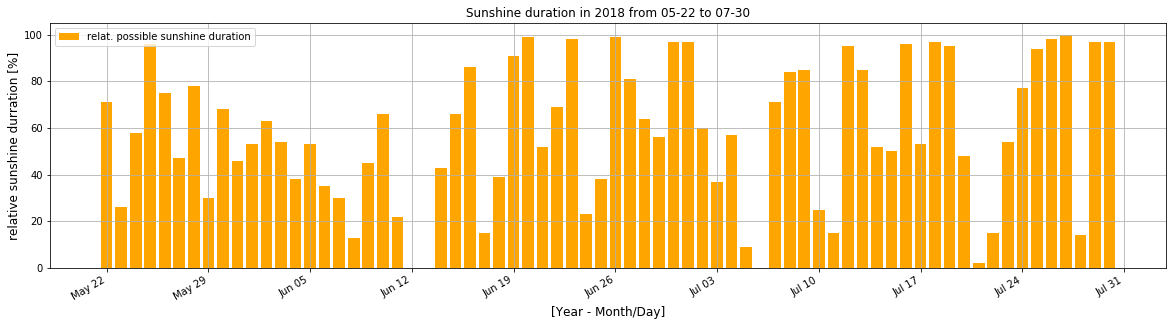

In [8]:
year = '2018-'   
s_day = '05-22' # beginning of observation
e_day = '07-30' # end of observation
start = year + s_day
end   = year + e_day

s_rel_2 = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_2.index, s_rel_2.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 August to September

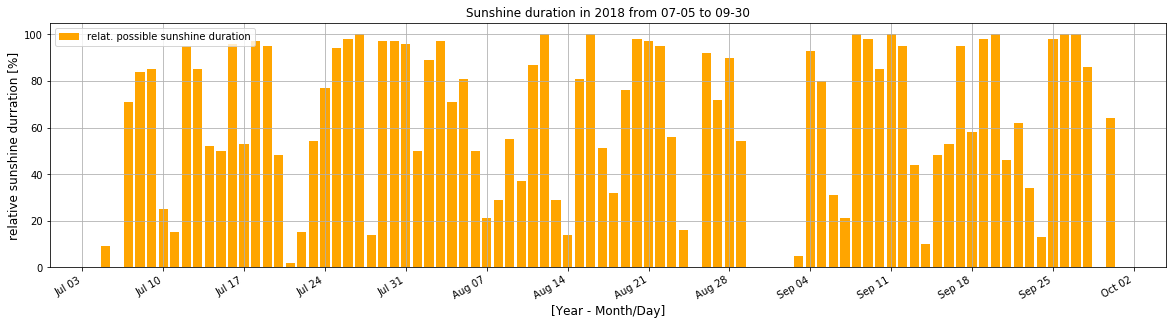

In [9]:
year = '2018-'   
s_day = '07-05' # beginning of observation
e_day = '09-30' # end of observation
start = year + s_day
end   = year + e_day

s_rel_3 = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_3.index, s_rel_3.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 Oktober to November

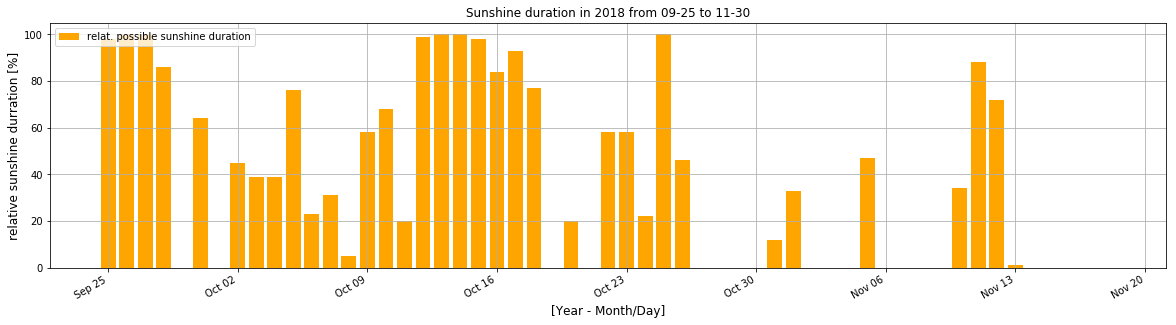

In [10]:
year = '2018-'   
s_day = '09-25' # beginning of observation
e_day = '11-30' # end of observation
start = year + s_day
end   = year + e_day

s_rel_4 = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_4.index, s_rel_4.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()